# UNDERSTANDING THE DATA

## IMPORTING THE REQUIRED LIBRARIES

In [1]:
pwd

'/home/wsuser/work'

In [8]:
!pip install keras==2.0.6
!pip install tensorflow==2.5.0

     |████████████████████████████████| 228 kB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 50.7 MB/s eta 0:00:01
  Created wheel for keras: filename=Keras-2.0.6-py3-none-any.whl size=266417 sha256=f06c587a966d1bde38fad3838d8a1ab04ce399df8b0aef1f6531027d331715d1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ca/53/82/14b166e4250a8de09b3562a5fc1d115de8489b2c2cd61d6843
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=e241b347c2ed9fa96b8f9eeeaad9ce7e47593d9963aa41a5f0732163fa6ba184
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/12/d8/36/e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [9]:
!pip install np_utils

     |████████████████████████████████| 61 kB 826 kB/s  eta 0:00:01
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=e7cfdc6d5e9fc8c8497311e28e67dcf2514ddb5f802abb6f5265d19045d9b519
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/65/07/4b/1c96f437e1bec60b3d2acd0b81d0a7969505f5251efbb5a060
Successfully built np-utils


In [12]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

## LOADING THE DATA

In [13]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
print(x_train.shape)

(60000, 28, 28)


In [15]:
print(x_test.shape)

(10000, 28, 28)


## ANALYZING THE DATA

In [16]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
y_train[0]

5

In [18]:
import matplotlib.pyplot as plt

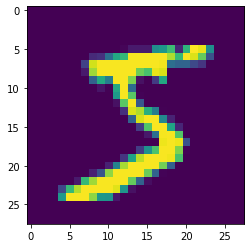

In [19]:
plt.imshow(x_train[0])

## RE-SHAPING DATA

In [20]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')

In [21]:
x_test=x_test.reshape(10000,28,28,1).astype('float32')

## APPLYING THE ONE HOT ENCODING

In [22]:
number_of_classes = 10

In [23]:
y_train = np_utils.to_categorical(y_train, number_of_classes)

In [24]:
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## ADD CNN LAYERS

In [27]:
!pip install tensorflow-cpu

     |████████████████████████████████| 214.5 MB 57 kB/s s eta 0:00:011
     |████████████████████████████████| 438 kB 88.4 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 87.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 91.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 84.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 75.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 79.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.12.0
    Uninstalling absl-py-0.12.0:
      Successfully uninstalled absl-py-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-

In [28]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

## COMPILING THE MODEL

In [29]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

## TRAIN THE MODEL( FITTING THE MODEL)

In [30]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.9518WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f236c47f9d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set t

## OBSERVING THE METRICS

In [31]:
metrics=model.evaluate(x_test,y_test,verbose=0)

In [32]:
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.09665708988904953, 0.9764999747276306]


## TEST THE MODEL

In [33]:
prediction=model.predict(x_test[:4])
print(prediction)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1.3096759e-14 4.4562231e-21 1.4107709e-13 1.1268649e-09 1.7992214e-20
  5.8099642e-16 1.0879347e-24 1.0000000e+00 1.9112568e-10 1.8649156e-13]
 [5.8128276e-11 8.0614355e-11 1.0000000e+00 1.2294171e-13 4.8901243e-18
  1.9634956e-19 6.3832811e-10 3.3413506e-15 2.5207078e-11 1.3733697e-17]
 [2.2711333e-06 9.999656

## OBSERVING THE METRICS

In [34]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.09665708988904953, 0.9764999747276306]


## TEST THE MODEL

In [35]:
prediction=model.predict(x_test[:4])
print(prediction)

[[1.3096759e-14 4.4562231e-21 1.4107709e-13 1.1268649e-09 1.7992214e-20
  5.8099642e-16 1.0879347e-24 1.0000000e+00 1.9112568e-10 1.8649156e-13]
 [5.8128276e-11 8.0614355e-11 1.0000000e+00 1.2294171e-13 4.8901243e-18
  1.9634956e-19 6.3832811e-10 3.3413506e-15 2.5207078e-11 1.3733697e-17]
 [2.2711333e-06 9.9996567e-01 1.0406180e-06 2.6087023e-11 1.3727129e-05
  3.0326530e-06 9.3466546e-10 6.7188338e-08 1.4176294e-05 6.2997990e-10]
 [9.9999940e-01 1.4793847e-14 3.2675129e-09 2.5054511e-13 1.0514031e-13
  9.3365413e-11 4.3459966e-07 3.1065175e-15 1.0726312e-09 1.6715792e-07]]


## SAVE THE MODEL

In [37]:
model.save('mnistCNN.h5')

## TEST WITH THE SAVED MODEL

In [38]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [40]:
ls -1

hdr_deployment.tgz
mnistCNN.h5
models/


In [41]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 10.4 MB/s eta 0:00:01


# Cloud Deploy

In [42]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"SL_wIUPQpale8IMSD3Ql4UfiKpk8Mdu1BmsV6_ho3KNc"
}
client = APIClient(credentials)
client

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/torch/package/_directory_reader.py:17: UserWarning: Failed to initialize NumPy: module compiled against API version 0xe but this version of numpy is 0xd (Triggered internally at  /opt/conda/conda-bld/pytorch-base_1658814980981/work/torch/csrc/utils/tensor_numpy.cpp:68.)
  _dtype_to_storage = {data_type(0).dtype: data_type for data_type in _storages}


In [51]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/508a2a484f674e62ad5813ee7fb78dcd:1824c9e4-ae14-451c-af8c-bc8b1abffe62::',
      'guid': '1824c9e4-ae14-451c-af8c-bc8b1abffe62',
      'name': 'Watson Machine Learning-ay',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'handwritten_recognition',
    'scope': {'bss_account_id': '508a2a484f674e62ad5813ee7fb78dcd'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'b0afee20-e628-430b-9245-317bd35f8583',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '342f845184be4d3fbbc302dc8a36b0f9',
        'api_key': 'f-9x06Y_lKoaCKd053YuNKzx-5YJVPaBTynF4vl3lZch',
        'secret_access_key': '87604d5e2cf1aa76a33008eb39f23ebea4694f503aefc001',
        'service_id': 'ServiceId-fdc073a1-ecc8-4d7f-8305-77e67f923345'},
       'editor': {'access_key_id': '2faf1b0e9a9a4925aebd2e2b67aa05d7',
     

In [52]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [53]:
space_uid = guid_from_space_name(client,'handwritten_recognition')
print("Space UID = " + space_uid)

Space UID = a405040d-37b5-4436-a579-e3f8bff0f95e


In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list(limit=100)


-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [56]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [57]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})


In [58]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-14T15:00:49.820Z',
  'id': '4fb1c6d7-4ace-4584-8781-7ab3f06449d5',
  'modified_at': '2022-11-14T15:00:52.787Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-661003WAUD',
  'resource_key': 'a8e72e5d-39d1-4266-b6ac-acd75d5664c5',
  'space_id': 'a405040d-37b5-4436-a579-e3f8bff0f95e'},
 'system': {'warnings': []}}

In [59]:
model_id = client.repository.get_model_id(model_details)
model_id

'4fb1c6d7-4ace-4584-8781-7ab3f06449d5'

In [60]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/DigitRecog_IBM_model.tar.gz'

In [61]:
ls

DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5  models/


# Test Model

In [63]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

In [64]:
model = load_model("mnistCNN.h5")


In [66]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def _iter_(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1rEQ4QsDyr45SbIYkkmEXGolFpDjMBjlc1KmxrsH2V1U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-kvpefjqsoxebrc'
object_key = '4.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

In [67]:
img = Image.open(streaming_body_3).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [68]:
img

In [27]:
from tensorflow.keras.models import load_model
model=load_model(r'C:\Users\meena\models\mnistCNN.h5')


In [28]:
from PIL import Image
import numpy as np

In [30]:
for index in range(4):
    img=Image.open('C:/Users/meena/'+str(index)+'.png').convert("L")
    img=img.resize((28,28))
    im2arr=np.array(img)
    im2arr=im2arr.reshape(1,28,28,1)
    y_pred=model.predict(im2arr)
    print(y_pred)

1/1 [==============================] - 0s 43ms/step
[[0.10841566 0.12407556 0.10467492 0.11038405 0.10014889 0.09499744
  0.11055182 0.08980202 0.0652207  0.09172902]]
1/1 [==============================] - 0s 17ms/step
[[0.09725864 0.11159753 0.0982668  0.09654304 0.0973888  0.09526405
  0.0975828  0.10167139 0.10338041 0.10104661]]
1/1 [==============================] - 0s 16ms/step
[[0.09728516 0.11177601 0.09809107 0.09665568 0.09739827 0.09523997
  0.09752914 0.1015369  0.10340285 0.10108501]]
1/1 [==============================] - 0s 15ms/step
[[0.0844951  0.09609288 0.11283562 0.09120862 0.09871554 0.09917869
  0.0905946  0.08719209 0.10847224 0.13121456]]
